In [1]:
import perda

In [ ]:
# csvPath = "[Practice Endurance] 05_25_23 09_39_05 PM.csv"
aly = perda.create()
aly2= perda.create()

Analyzer Created


In [3]:
aly.reset()

Reset Analyzer


In [4]:
aly.read_csv(csvPath)

Reading file: PER CSV Modbus Log 05/25/23 09:39:05 PM



Processing CSV: 17791117lines [00:32, 553214.49lines/s]


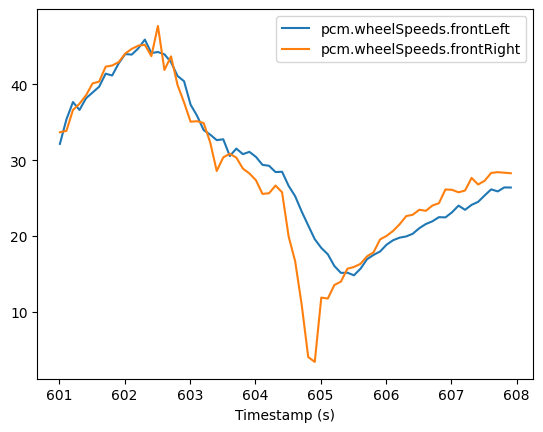

In [ ]:
variables = [
    "pcm.wheelSpeeds.frontLeft",
    "pcm.wheelSpeeds.frontRight"
]

aly.set_plot(start_time = 601000, end_time = 608000, unit = "ms")
aly.plot(variables)